In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

df = pd.read_csv('Final_Dataset.csv')

In [42]:
df.drop(df.columns[0], axis=1, inplace=True)

In [43]:
df.head()

,Video Views,Creator Gender,Language of the Video,Video Description,Video Quality,Duration,Premiered or Not,Total Channel Subcribers,Total Chanel Views,No of Likes,Hashtags,No of Videos the Channel,Community Engagement (Posts per week)
0,146059,Male,Kannada,Yes,Medium,long,No,0.000132,0.000111,0.000137,0.000000,0.001098,0.002933
1,231969,Male,Telugu,Yes,Medium,medium,Yes,0.003014,0.001923,0.000159,0.035714,0.000595,0.005865
2,878,Female,Hindi,Yes,Medium,medium,No,0.000001,0.000001,0.000018,0.000000,0.000374,0.000000
3,9965,Org,English,Yes,Medium,short,No,0.005504,0.007573,0.000004,0.000000,0.033093,0.041056
4,39780561,Org,English,Yes,Medium,medium,No,0.039646,0.050337,0.018388,0.000000,0.006836,0.002933


## Transformation

In [44]:
# Converting Video View column, which is a continuoud feature to categorical feature

data = df['Video Views']

values = []

for index, val in enumerate(data):
    if val > 20000:
        values.append("Popular")
    else:
        values.append("Not Popular")
    
df.insert(1, "Popularity", values)

In [45]:
df.drop('Video Views',axis=1,inplace=True)

In [46]:
df.head()

,Popularity,Creator Gender,Language of the Video,Video Description,Video Quality,Duration,Premiered or Not,Total Channel Subcribers,Total Chanel Views,No of Likes,Hashtags,No of Videos the Channel,Community Engagement (Posts per week)
0,Popular,Male,Kannada,Yes,Medium,long,No,0.000132,0.000111,0.000137,0.000000,0.001098,0.002933
1,Popular,Male,Telugu,Yes,Medium,medium,Yes,0.003014,0.001923,0.000159,0.035714,0.000595,0.005865
2,Not Popular,Female,Hindi,Yes,Medium,medium,No,0.000001,0.000001,0.000018,0.000000,0.000374,0.000000
3,Not Popular,Org,English,Yes,Medium,short,No,0.005504,0.007573,0.000004,0.000000,0.033093,0.041056
4,Popular,Org,English,Yes,Medium,medium,No,0.039646,0.050337,0.018388,0.000000,0.006836,0.002933


In [47]:
df['Popularity'].value_counts()

Popular        813
Not Popular     70
Name: Popularity, dtype: int64

## One Hot Encoding

In [51]:
df_copy = pd.get_dummies(df.drop('Popularity',axis=1))

In [52]:
df_copy.insert(0, "Popularity", values)

## Balancing Popularity column using SMOTE 

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=50)
x_smote,y_smote = smote.fit_resample(df_copy.drop('Popularity',axis='columns'),df_copy.Popularity)
df_copy=pd.concat([x_smote,y_smote],axis=1)
df_copy.head()

,Total Channel Subcribers,Total Chanel Views,No of Likes,Hashtags,No of Videos the Channel,Community Engagement (Posts per week),Creator Gender_Female,Creator Gender_Male,Creator Gender_Org,Language of the Video_Arabic,...,Video Description_Yes,Video Quality_High,Video Quality_Low,Video Quality_Medium,Duration_long,Duration_medium,Duration_short,Premiered or Not_No,Premiered or Not_Yes,Popularity
0,0.000132,0.000111,0.000137,0.000000,0.001098,0.002933,0,1,0,0,...,1,0,0,1,1,0,0,1,0,Popular
1,0.003014,0.001923,0.000159,0.035714,0.000595,0.005865,0,1,0,0,...,1,0,0,1,0,1,0,0,1,Popular
2,0.000001,0.000001,0.000018,0.000000,0.000374,0.000000,1,0,0,0,...,1,0,0,1,0,1,0,1,0,Not Popular
3,0.005504,0.007573,0.000004,0.000000,0.033093,0.041056,0,0,1,0,...,1,0,0,1,0,0,1,1,0,Not Popular
4,0.039646,0.050337,0.018388,0.000000,0.006836,0.002933,0,0,1,0,...,1,0,0,1,0,1,0,1,0,Popular


In [56]:
df_copy['Popularity'].value_counts()

Popular        813
Not Popular    813
Name: Popularity, dtype: int64

## Splitting the data to training and testing data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = df_copy.drop('Popularity', axis=1)
y = df_copy['Popularity']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## Model Building

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.metrics import precision_score

### Similarity Based Learning : KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

Training Accuracy:  0.9209138840070299


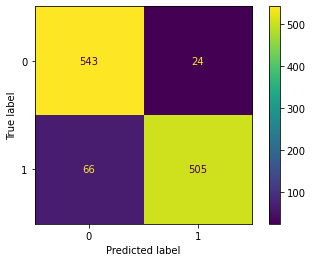

Training Precision Score:  0.9546313799621928 



In [70]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)

# Training
y_pred = knn_model.predict(x_train)
print("Training Accuracy: ", accuracy_score(y_train,y_pred))
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Training Precision Score: ", precision_score(y_train, y_pred, pos_label='Popular'), '\n')

Testing Accuracy:  0.889344262295082


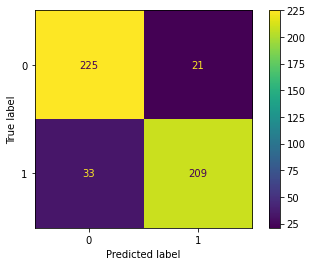

Testing Precision Score:  0.908695652173913


In [71]:
# Testing
y_pred = knn_model.predict(x_test)
print("Testing Accuracy: ", accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Testing Precision Score: ", precision_score(y_test, y_pred, pos_label="Popular"))

### Probability Based Learning : Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import GaussianNB

Training Accuracy:  0.6942003514938488


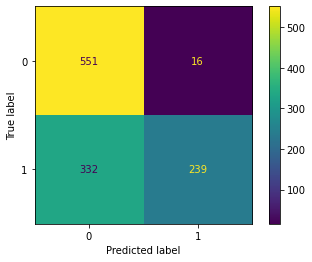

Training Precision Score:  0.9372549019607843 



In [65]:
classifier = GaussianNB()
model = classifier.fit(x_train,y_train)

# Training
y_pred = model.predict(x_train)
print("Training Accuracy: ", accuracy_score(y_train,y_pred))
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Training Precision Score: ", precision_score(y_train, y_pred, pos_label='Popular'), '\n')
# print("Classification report: \n",classification_report(y_train,y_pred),'\n')



Testing Accuracy:  0.7192622950819673


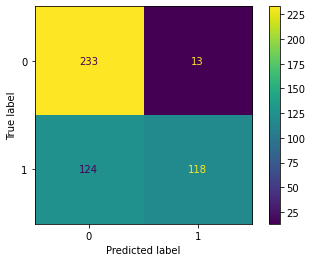

Testing Precision Score:  0.9007633587786259


In [66]:
# Testing
y_pred = model.predict(x_test)
print("Testing Accuracy: ", accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Testing Precision Score: ", precision_score(y_test, y_pred, pos_label='Popular'))
# print("Classification report: \n",classification_report(y_test,y_pred),'\n')

### Error Based Learning: Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

Training Accuracy:  0.812829525483304


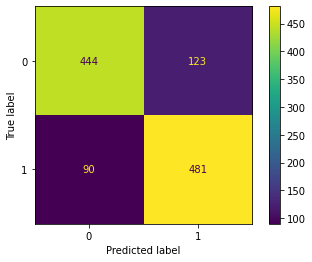

Training Precision Score:  0.7963576158940397 



In [68]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

# Training
y_pred = model.predict(x_train)
print("Training Accuracy: ", accuracy_score(y_train,y_pred))
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Training Precision Score: ", precision_score(y_train, y_pred, pos_label='Popular'), '\n')
# print("Classification report: \n",classification_report(y_train,y_pred),'\n')

Training Accuracy:  0.8114754098360656


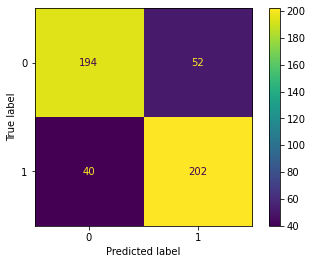

Testing Precision Score:  0.7952755905511811 



In [69]:
# Training
y_pred = model.predict(x_test)
print("Training Accuracy: ", accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Testing Precision Score: ", precision_score(y_test, y_pred, pos_label='Popular'), '\n')
# print("Classification report: \n",classification_report(y_test,y_pred),'\n')